## Group Assignment Week 15

In [158]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la
from scipy.special import eval_hermitenorm, factorial
import scipy

### Problem 1 (洪图 检查：毛亦嘉)

<font size = 4 color = black face = "Times New Roman">(1)

<font size = 4 color = black face = "Times New Roman">$x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$ over $\left[  0,1\right]$ with $x\left(  0\right)  =5$ and $x\left(  1\right)  =10,$ $x\left(  t\right) =t^{2}+4t+5$.

$p(t) = 2$  
$q(t) = -1$  
$r(t) = t^2 - 1$

In [159]:
def p(x):
    return 2*x**0
def q(x):
    return -1*x**0
def r(x):
    return x**2 - 1

In [160]:
t0 = 5
tN = 10

In [161]:
h1 = 0.1
h2 = 0.01
t1 = np.arange(0+h1, 1, h1)
t2 = np.arange(0+h2, 1, h2)
p1 = p(t1)
q1 = q(t1)
r1 = r(t1)
p2 = p(t2)
q2 = q(t2)
r2 = r(t2)

In [162]:
def matrix_A(h, p, q, r):
    N = int(1 / h)
    A = np.zeros((N-1,N-1))
    for i in range(N-1):
        A[i][i] = -2 - h**2*q[i]
        if i < N-2:
            A[i][i+1] = 1 - (h/2)*p[i]
            A[i+1][i] = 1 + (h/2)*p[i+1]
    return A

In [163]:
def matrix_b(h, x0, xN, p, q, r):
    N = int(1 / h)    
    b = np.zeros(N-1)
    b = h**2*r
    b[0] = b[0] - (1 + (h/2)*p[0])*x0
    b[-1] = b[-1] - (1 + (h/2)*p[-1])*xN
    return b

In [164]:
A1 = matrix_A(h1, p1, q1, r1)
b1 = matrix_b(h1, t0, tN, p1, q1, r1)
A2 = matrix_A(h2, p2, q2, r2)
b2 = matrix_b(h2, t0, tN, p2, q2, r2)

In [165]:
x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)

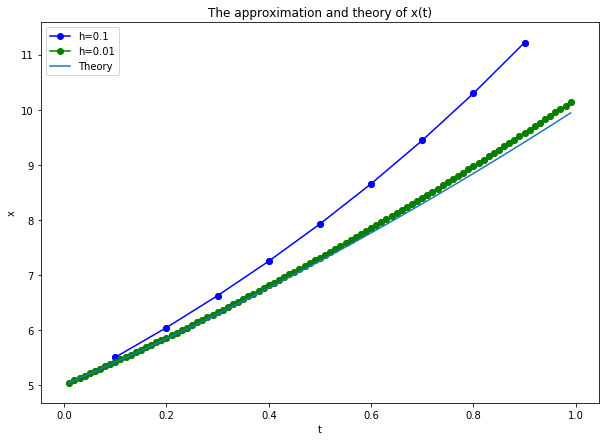

In [166]:
fig = plt.figure(figsize=(10,7))
plt.title
plt.plot(t1, x1,'bo-',label = 'h=0.1')
plt.plot(t2, x2,'go-',label = 'h=0.01')
plt.plot(t2, t2**2 + 4*t2 + 5,label = 'Theory')
plt.scatter(t1, x1)
plt.scatter(t2, x2)
plt.xlabel('t')
plt.ylabel('x')
plt.title('The approximation and theory of x(t)')
plt.legend()
plt.show()

<font size = 4 color = black face = "Times New Roman">I ignore the boundary value here. We can see when h=0.1, the approximation is not very good. But when h=0.01, the result is beautiful enough. 

(2)

<font size = 4 color = black face = "Times New Roman">
$x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(
       4t^{2}\right)  )x=0$ over $\left[  1,6\right]$ with $x\left(  1\right)  =1$ and $x\left(  6\right)  =0,$ $x\left(  t\right)  =\dfrac{0.2913843206\cos   \left(  t\right)  +1.01299385\sin\left(  t\right)  }{\sqrt{t}}$.

In [167]:
def p(x):
    return -1/x
def q(x):
    return 1/(4*x**2) - 1
def r(x):
    return x**0 * 0

In [168]:
t0 = 1
tN = 0

In [169]:
h1 = 0.1
h2 = 0.01
t1 = np.arange(1+h1, 6, h1)
t2 = np.arange(1+h2, 6, h2)
p1 = p(t1)
q1 = q(t1)
r1 = r(t1)
p2 = p(t2)
q2 = q(t2)
r2 = r(t2)

In [170]:
def matrix_A(h, p, q, r):
    N = int(5 / h)
    A = np.zeros((N-1,N-1))
    for i in range(N-1):
        A[i][i] = -2 - h**2*q[i]
        if i < N-2:
            A[i][i+1] = 1 - (h/2)*p[i]
            A[i+1][i] = 1 + (h/2)*p[i+1]
    return A

In [171]:
def matrix_b(h, x0, xN, p, q, r):
    N = int(5 / h)    
    b = np.zeros(N-1)
    b = h**2*r
    b[0] = b[0] - (1 + (h/2)*p[0])*x0
    b[-1] = b[-1] - (1 + (h/2)*p[-1])*xN
    return b

In [172]:
A1 = matrix_A(h1, p1, q1, r1)
b1 = matrix_b(h1, t0, tN, p1, q1, r1)
A2 = matrix_A(h2, p2, q2, r2)
b2 = matrix_b(h2, t0, tN, p2, q2, r2)

In [173]:
x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)

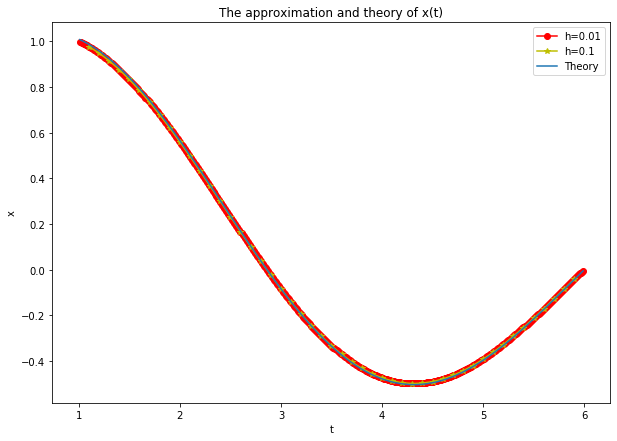

In [174]:
fig = plt.figure(figsize=(10,7))
plt.title
plt.plot(t2, x2,'ro-',label = 'h=0.01') # Exchange the plot order to make the plot more clear.
plt.plot(t1, x1,'y*-',label = 'h=0.1')
plt.plot(t2, (0.2913843206*np.cos(t2)+1.01299385*np.sin(t2))/np.sqrt(t2),label = 'Theory')
plt.scatter(t1, x1, s=16.)
plt.scatter(t2, x2, s=16.)
plt.xlabel('t')
plt.ylabel('x')
plt.title('The approximation and theory of x(t)')
plt.legend()
plt.show()

<font size = 4 color = black face = "Times New Roman">For this problem, approximation are both good.

### Problem 2 (毛亦嘉 检查：黄家乐)

<font size = 4 color = black face = "Times New Roman">
In this problem, we're going to deal with
$$
    u_{xx} + 4u_x + e^xu = \sin(8x)
    $$
   numerically on $[-1, 1]$ with boundary conditions $u(\pm1) = 0$.<br>
    
Here, I still choose to apply the **shooting method** here. Firstly, I transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dt}\begin{pmatrix}
u\\
u^\prime
\end{pmatrix}
=\begin{pmatrix}
u^\prime\\
sin(8x)-e^xu - 4u^\prime
\end{pmatrix}
$$
thus
$$
\frac{d}{dt}\begin{pmatrix}
u_0\\
u_1
\end{pmatrix}
=\begin{pmatrix}
u_1\\
sin(8x)-e^xu_0 - 4u_1
\end{pmatrix}
$$

In [175]:
def rk4(f,y0,t,args=None): 
    # Heun's method
    dt = t[1] - t[0]
    y = np.zeros((len(t), y0.size))
    y[0] = y0
    for n in range(0, len(t) - 1):
        k1 = np.array(f(y[n], t[n], args))
        k2 = np.array(f(y[n] + dt*k1/2, t[n] + dt/2, args))
        k3 = np.array(f(y[n] + dt*k2/2, t[n] + dt/2, args))
        k4 = np.array(f(y[n] + dt*k3, t[n+1], args))        
        y[n+1] = y[n] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

In [176]:
def bisection(f, x_L, x_R, eps):
# apply Newton-Raphson method to solve f(x)=0
# input - 
# f: defined function, 
# x_L, x_R: double, initial guess of the interval, in which the function changes the sign
# eps: double， the defined tolerance
# output - 
# x_M: double， the numerical approximation of the root
# iteration_counter: integer, the total number of iterations

    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(x_L - x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
            f_R = f_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1

    return x_M, iteration_counter
    

In [177]:
dx = 0.01
xlow = -1
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

In [178]:
def drive_func(y,x,args=None):
    dydx = [y[1], np.sin(8*x)-np.exp(x)*y[0]-4*y[1]]
    return dydx

In [179]:
def solve_ode(alpha):
    y0 = 0
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y

In [180]:
def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [181]:
def plot_root_func(ax):
    alphas = np.linspace(-1,1,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()

In [182]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(15,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha, iteration_counter = bisection(root_func,0,1,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('u')
    ax[1].set_title('$ u_{xx} + 4u_x + e^xu = \sin(8x), u(\pm1) = 0$')

0.0885772705078125


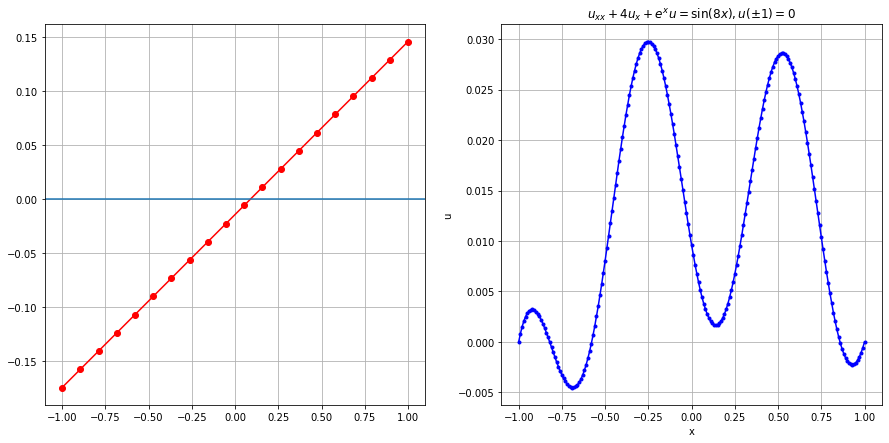

In [183]:
if __name__ == '__main__':
    shoot_bisection()

<font size = 4 color = black face = "Times New Roman">
The result is shown in the picture at right.

### Problem 3 (洪图 检查：毛亦嘉)

In [184]:
def Morse_oscillator_eigenvalues(N,mass=1,D=1,beta=0.3,lowest=5):
    # V(x) = D(1 − e^−bx)^2, Morse oscillator
    omega0 = np.sqrt(2*D*beta**2/mass)
    s = 1/np.sqrt(mass*omega0)
    n = np.arange(1, N)
    m = np.sqrt(n)
    
    x = s/np.sqrt(2) * (np.diag(m,-1) + np.diag(m,1))
    p = 1j/s/np.sqrt(2) * (np.diag(m,-1) - np.diag(m,1))
    
    temp = la.expm(-beta*x)
    One = np.eye(x.shape[0])
    
    H = np.dot(p,p)/2/mass + D * np.dot(One - temp, One - temp)
    E, v = la.eigh(H)
    
    # error calculate
    ns = np.arange(0,lowest)    
    E_exact =  omega0 * (ns + 0.5) - omega0*omega0/(4*D)*(ns + 0.5)*(ns + 0.5) 
    error = max(abs(E[ns] - E_exact))
    
    return E[0:lowest], error, v[0:lowest]

def Morse_Theory(lowest,mass=1,D=1,beta=0.3):
    ns = np.arange(0,lowest)
    omega0 = np.sqrt(2*D*beta**2/mass)
    E_exact =  omega0 * (ns + 0.5) - omega0*omega0/(4*D)*(ns + 0.5)*(ns + 0.5) 
    return E_exact

In [185]:
E_50, error_50, v = Morse_oscillator_eigenvalues(N=50,mass=1,D=1,beta=0.3,lowest=5)
print('Numerical result:', E_50)
print('error:', error_50)

Numerical result: [0.20088203 0.5351461  0.77941531 0.93585914 1.04663758]
error: 0.048699275428282895


<font size = 4 color = black face = "Times New Roman">Here we can see that the first four numerical rusults are accurate enough when N=50. Let's try to enlarge N.

In [186]:
n_test = np.array([10 * i for i in range(1, 20)])
error = np.zeros(len(n_test))
E = np.zeros((len(n_test), 5))
v1 = np.zeros((len(n_test),5))
for i in range(len(n_test)):
    E[i],error[i],v1 = Morse_oscillator_eigenvalues(N=n_test[i],mass=1,D=1,beta=0.3,lowest=5)

In [187]:
print('Theory:')
print(Morse_Theory(lowest = 5))
print('E:')
print(E)

Theory:
[0.20088203 0.5351461  0.77941017 0.93367424 0.99793831]
E:
[[0.2008804  0.53620429 0.8045183  1.11282015 1.46284615]
 [0.20088204 0.53516511 0.78236281 0.98595455 1.2303936 ]
 [0.20088203 0.5351466  0.77971937 0.95053074 1.12407283]
 [0.20088203 0.53514612 0.77944713 0.93955592 1.07361487]
 [0.20088203 0.5351461  0.77941531 0.93585914 1.04663758]
 [0.20088203 0.5351461  0.77941099 0.93452917 1.03098333]
 [0.20088203 0.5351461  0.77941032 0.93402435 1.02133055]
 [0.20088203 0.5351461  0.7794102  0.93382364 1.0150839 ]
 [0.20088203 0.5351461  0.77941018 0.93374044 1.01087612]
 [0.20088203 0.5351461  0.77941017 0.9337046  1.00794345]
 [0.20088203 0.5351461  0.77941017 0.93368861 1.00583859]
 [0.20088203 0.5351461  0.77941017 0.93368124 1.00428891]
 [0.20088203 0.5351461  0.77941017 0.93367774 1.00312234]
 [0.20088203 0.5351461  0.77941017 0.93367603 1.00222691]
 [0.20088203 0.5351461  0.77941017 0.93367518 1.00152771]
 [0.20088203 0.5351461  0.77941017 0.93367474 1.00097338]
 [0.

<font size = 4 color = black face = "Times New Roman">We can see the bigger eigenvalue becomes more accurate, let's have a plot.

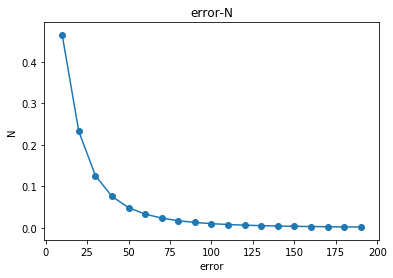

In [188]:
plt.plot(n_test, error)
plt.scatter(n_test, error)
plt.title('error-N')
plt.xlabel('error')
plt.ylabel('N')
plt.show()

<font size = 4 color = black face = "Times New Roman">We can see when N is bigger, the result is more accurate.

<font size = 4 color = black face = "Times New Roman">(2)

In [189]:
mass=1
D=1
beta=0.3
omega0 = np.sqrt(2*D*beta**2/mass)
N = 50
x = np.arange(-10,15,0.1)
A = np.zeros((N, len(x)))

for n in range(0,N):
    c = np.sqrt(mass*omega0) * x 
    A[n] = (mass*omega0/np.pi)**(1/4)*eval_hermitenorm(n,c)/np.sqrt(2**n*factorial(n))*np.exp(-c**2/2)

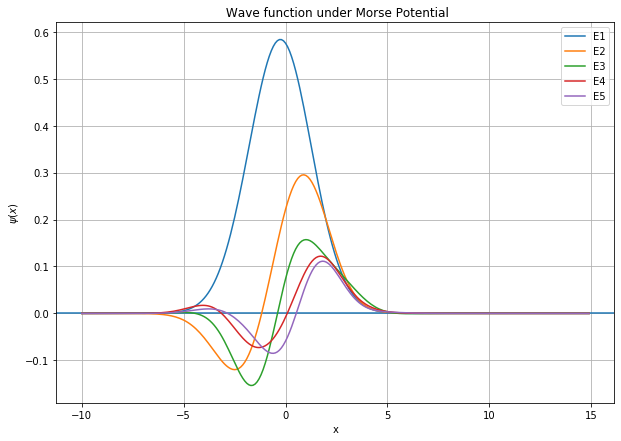

In [190]:
waves = np.real(v[0:5]@A)
fig = plt.figure(figsize=(10,7))
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.grid('on')
plt.axhline()
plt.plot(x, waves[0],label = 'E1')
plt.plot(x, waves[1],label = 'E2')
plt.plot(x, waves[2],label = 'E3')
plt.plot(x, waves[3],label = 'E4')
plt.plot(x, waves[4],label = 'E5')
plt.title(' Wave function under Morse Potential')
plt.legend()
plt.show()

### Problem 4 (毛亦嘉 检查：黄家乐)

<font size = 4 color = black face = "Times New Roman">
This problem deals with the the first few energy levels and the associated wave functions for a potential of the form
    $$
    V = \frac{1}{2}k_1x^2+\frac{1}{2}k_2{x^4}
    $$
I set $k_1=1$, $k_2=0.1$. $\hbar=m=1$ in this problem and mainly apply sample script(matching method in this problem but with modifications due to this problem.

In [191]:
def potential(x,k_1=1,k_2=0.1): # Set the petential
    return 0.5*k_1*x**2+0.5*k_2*x**4

In [192]:
def generate_x_grid(n=0,dx=0.1,k_1=1):
    # n=0,1,2, : energy levels
    x0 = 1/np.sqrt(k_1)
    xmax = 10 * x0
    x = np.arange(-xmax, xmax+dx, dx)  
    return x

In [193]:
def initialize_psi(N):
    # intialize wave function
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

In [194]:
def oscillator_matching(n=0,E=0, k_1=1,k_2 =0.1,dx=0.1, dE=0.1):
    # energy level n=0,1,2...
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    x = generate_x_grid(n,dx,k_1);
    N = len(x)

    psi = initialize_psi(N);    

   
    tol = 0.5e-6   # stopping criterion, if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    
    matching_index = np.argmin(potential(x,k_1,k_2))
    # print(matching_index)
    
    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1],k_1,k_2)) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - potential(x[i+1],k_1,k_2)) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi)) # normalisation
    
    return E,x,psi

In [195]:
def oscillator_matching_app(k_1=1,k_2=0.1,dx=0.1):
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.05
    
    for n in range(0,5):
        
        E,x,psi = oscillator_matching(n,E_init,k_1,k_2,dx)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
                
        E_init = E + DeltaE
    
    plt.legend()
    plt.title('Oscillator $k_1 = {:}, k_2={}$'.format(k_1,k_2))

E = 0.533, normalizatoin = 1.00000
E = 1.653, normalizatoin = 1.00000
E = 2.874, normalizatoin = 1.00000
E = 4.176, normalizatoin = 1.00000
E = 5.549, normalizatoin = 1.00000


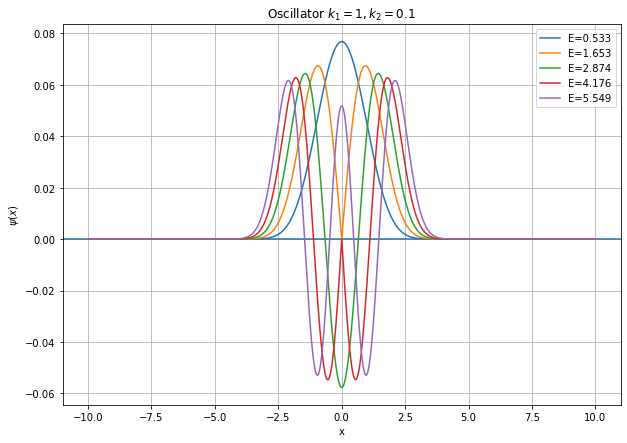

In [196]:
if __name__ == '__main__':
    oscillator_matching_app(k_1=1,k_2=0.1,dx=0.01)

<font size = 4 color = black face = "Times New Roman">
The first few energy levels and the associated wave functions for a potential are shown in the figure above.

### (Optional)Problem 5 (黄家乐 检查：洪图)

In [197]:
# Define the potential
def LJ_potential(x):
    return 4 * 10 * ((1 / x) ** 12 - (1 / x) ** 6)

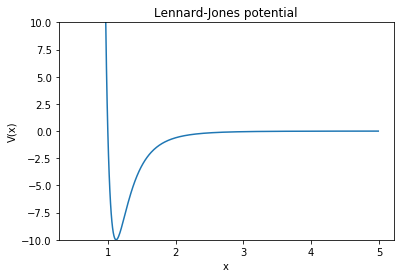

In [198]:
# plot the potential
x = np.arange(0.5, 5, 0.01)
V = LJ_potential(x)
plt.plot(x, V)
plt.ylim(-10,10)
plt.title('Lennard-Jones potential')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

<font size = 4 color = black face = "Times New Roman">From this figure, we are easy to know that the minimum of the potential in (1,1.5). In this problem, I'd like to use the function numpy.argmin() to find the matching point.

In [199]:
#Intialize wave function
def initialize_psi(N):
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

In [200]:
#Define LJ_matching method
def LJ_matching(n = 0, E = 0, dE = 0.1):
    # n is energy level
    # initial guess of energy E, increment dE

    x = np.arange(0.5, 5, 0.01)
    N = len(x)

    psi = initialize_psi(N)

    tol = 0.5e-7 #check if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx = 0.01
    dx2 = dx * dx
    
    matching_index = np.argmin(LJ_potential(x)) # Find the matching point's index

    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - LJ_potential(x[i-1])) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - LJ_potential(x[i+1])) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi)) # normalisation
    
    return E,x,psi

In [201]:
def LJ_matching_app():
    
    # plot the lowest four states

    #initial plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline() 

    # initialize first guess
    E_init = -5
    DeltaE = 0.05

    for n in range(0,5):
        
        E,x,psi = LJ_matching(n,E_init)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
                
        E_init = E + DeltaE

    plt.legend()
    plt.title('Lennard-Jones wavefunction')

E = -1.890, normalizatoin = 1.00000
E = 0.221, normalizatoin = 1.00000
E = 0.398, normalizatoin = 1.00000
E = 1.228, normalizatoin = 1.00000
E = 1.616, normalizatoin = 1.00000


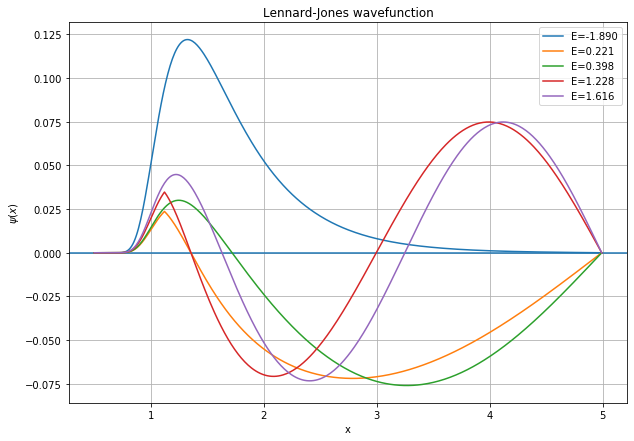

In [202]:
if __name__ == '__main__':
    LJ_matching_app()

### Problem 8 (黄家乐 检查：洪图)

<font size = 4 color = black face = "Times New Roman">We can use two-dimensional vectors to represent the coordinates of each dart. And I'm going to draw the corresponding graph to show you my result.

In [203]:
N = 100000
# Generates positions of dart.
dart_positions = np.random.rand(N, 2)

In [204]:
# Get the distance between each dart and origin
distance = np.linalg.norm(dart_positions,axis = 1)

In [205]:
# The number of darts that insder the circle for N = 1,2,3... 10000
inside = np.cumsum(distance < 1)

In [206]:
numbers = np.arange(1, N+1, 1)

In [207]:
# calculate pi
calculated_pi = 4 * inside / numbers
pi = np.pi

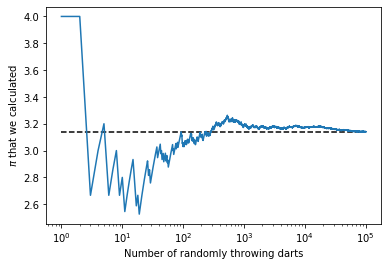

In [208]:
fig,ax = plt.subplots()
plt.semilogx(numbers, calculated_pi)
ax.hlines(y = np.pi, xmin = 1, xmax = N+1, linestyle='--') 
plt.xlabel('Number of randomly throwing darts')
plt.ylabel(r'$\pi$ that we calculated')
plt.show()

<font size = 4 color = black face = "Times New Roman">Hence we have gotten the right value of $\pi$, when N is large enough.